# Analiza podataka train dataset-a

U ovoj bilježnici nalaze se postupci analize i vizualizacije podataka train dataset-a.

Prvo počinjemo uvozom potrebnih biblioteka.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

Zatim pronalazimo lokaciju i učitavamo .csv datoteku s podatcima.

In [2]:
path = Path.cwd().parent.parent
filePath = str(path) + "/data_cleanup/train_data_cleaned.parquet"
df = pd.read_parquet(filePath)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14824 entries, 0 to 31633
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   reservation_id      14824 non-null  int64         
 1   stay_date           14824 non-null  datetime64[ns]
 2   guest_id            14824 non-null  int64         
 3   guest_country_id    14824 non-null  object        
 4   reservation_status  14824 non-null  object        
 5   reservation_date    14824 non-null  datetime64[ns]
 6   date_from           14824 non-null  datetime64[ns]
 7   date_to             14824 non-null  datetime64[ns]
 8   resort_id           14824 non-null  int64         
 9   cancel_date         2764 non-null   object        
 10  room_cnt            14824 non-null  int64         
 11  adult_cnt           14824 non-null  int64         
 12  children_cnt        14824 non-null  int64         
 13  price               12845 non-null  float64       


In [3]:
df = df[df["reservation_status"] == "Checked-out"]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12060 entries, 0 to 31633
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   reservation_id      12060 non-null  int64         
 1   stay_date           12060 non-null  datetime64[ns]
 2   guest_id            12060 non-null  int64         
 3   guest_country_id    12060 non-null  object        
 4   reservation_status  12060 non-null  object        
 5   reservation_date    12060 non-null  datetime64[ns]
 6   date_from           12060 non-null  datetime64[ns]
 7   date_to             12060 non-null  datetime64[ns]
 8   resort_id           12060 non-null  int64         
 9   cancel_date         0 non-null      object        
 10  room_cnt            12060 non-null  int64         
 11  adult_cnt           12060 non-null  int64         
 12  children_cnt        12060 non-null  int64         
 13  price               11948 non-null  float64       


In [4]:
df["guest_count"] = df["adult_cnt"] + df["children_cnt"]
occupancy = df[(df["cancel_date"].isna())]

dates = []
for index, row in occupancy.iterrows():
    delta = (row["date_to"] - row["date_from"]).days
    for i in range(delta):
        dates.append((row["date_from"] + pd.Timedelta(days=i), row["guest_count"]))

# Pretvaranje u DataFrame
dates_df = pd.DataFrame(dates, columns=["date", "guest_count"])

# Grupiranje po datumu i sumiranje broja gostiju
occupancy = dates_df.groupby("date")["guest_count"].sum().reset_index()
occupancy.index = occupancy["date"]
del occupancy["date"]
occupancy.to_csv("train_data_occupancy.csv")
occupancy.to_parquet("train_data_occupancy.parquet")
occupancy.head()

,guest_count
date,
2007-12-13,1
2007-12-14,1
2008-01-01,45
2008-01-02,6
2008-01-03,26


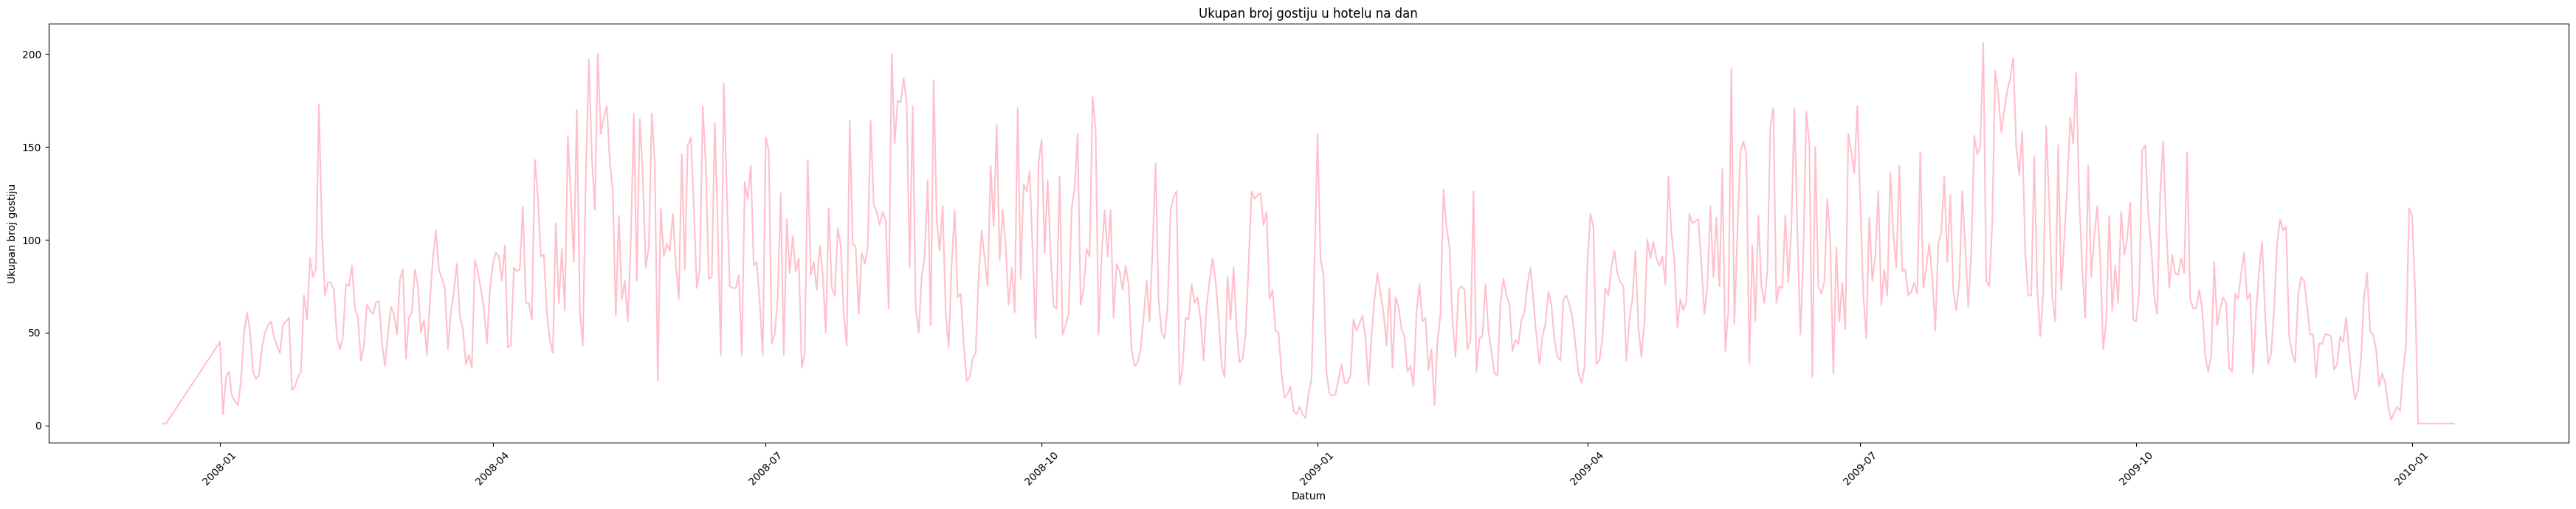

In [5]:
plt.figure(figsize=(35, 7))  
plt.plot(occupancy.index, occupancy["guest_count"], color="pink")
plt.title("Ukupan broj gostiju u hotelu na dan")
plt.xlabel("Datum")
plt.ylabel("Ukupan broj gostiju")
plt.xticks(rotation = 45) 
plt.tight_layout()  
plt.show()

Sad imamo graf popunjenosti hotela.
Iz grafa vidimo ...

Dalje gledamo kretanje broja rezervacija.


In [6]:
df["reservation_date"] = df["reservation_date"].dt.date
reservation_count = df["reservation_date"].value_counts().reset_index()
reservation_count.index = reservation_count["reservation_date"]
del reservation_count["reservation_date"]
reservation_count.head()


,count
reservation_date,
2008-02-27,52
2008-03-27,43
2008-10-14,42
2009-10-10,41
2008-09-17,40


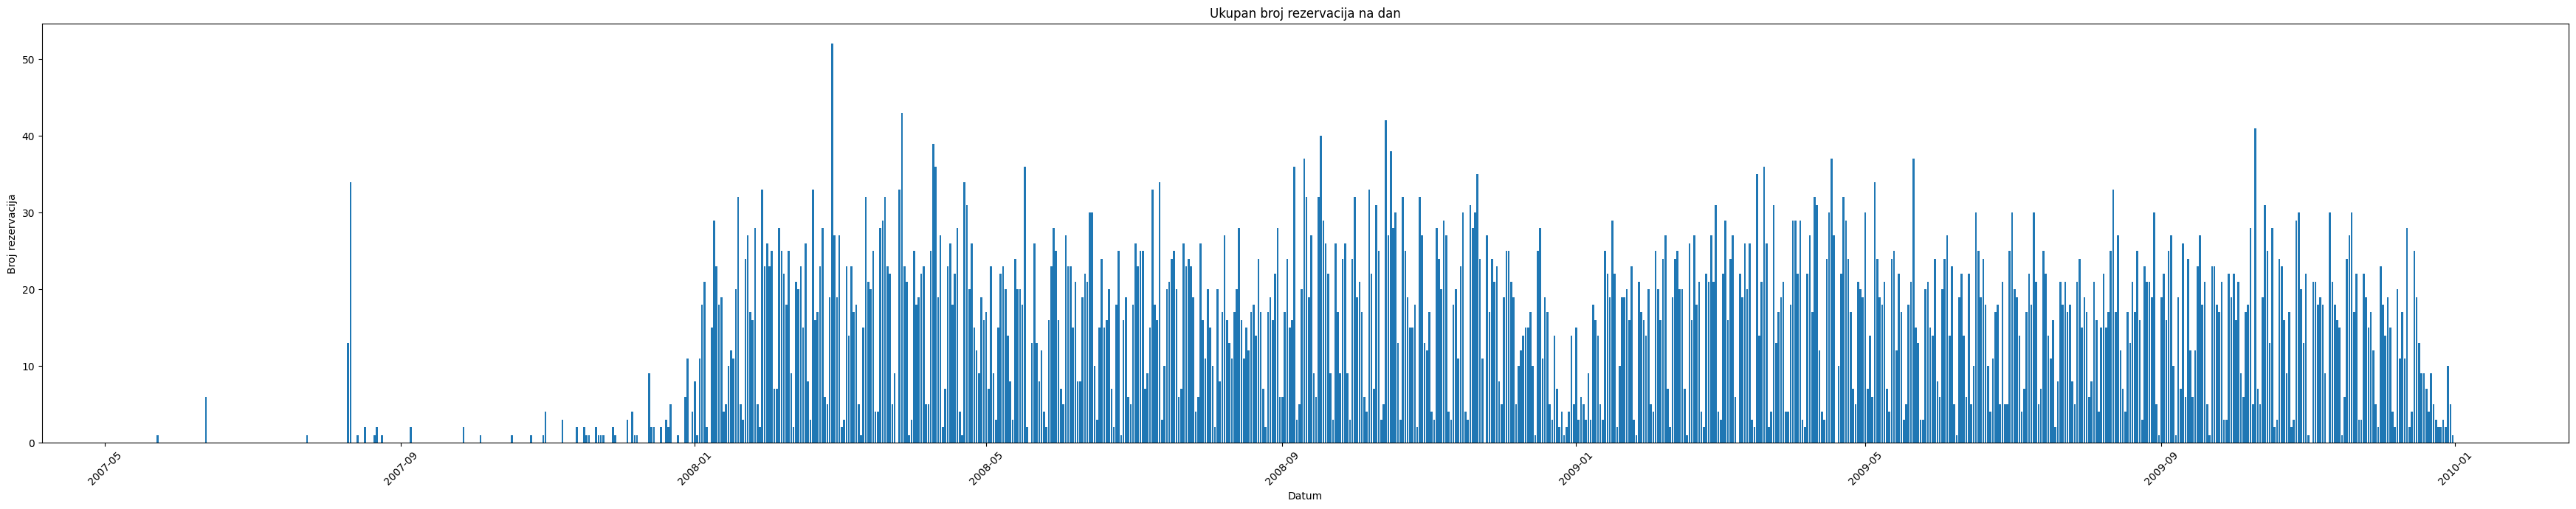

In [7]:
plt.figure(figsize=(35, 7))  
plt.bar(reservation_count.index, reservation_count["count"])
plt.title("Ukupan broj rezervacija na dan")
plt.xlabel("Datum")
plt.ylabel("Broj rezervacija")
plt.xticks(rotation = 45) 
plt.tight_layout()  
plt.show()

Dalje gledamo dnevni broj dolazaka.

In [79]:
arrival = df[(df["cancel_date"].isna())]
arrival_count = arrival["date_from"].value_counts().reset_index()
arrival_count.index = arrival_count["date_from"]
del arrival_count["date_from"]
arrival_count.head()

,count
date_from,
2008-09-11,46
2008-12-02,41
2008-10-16,40
2009-04-17,39
2009-10-10,37


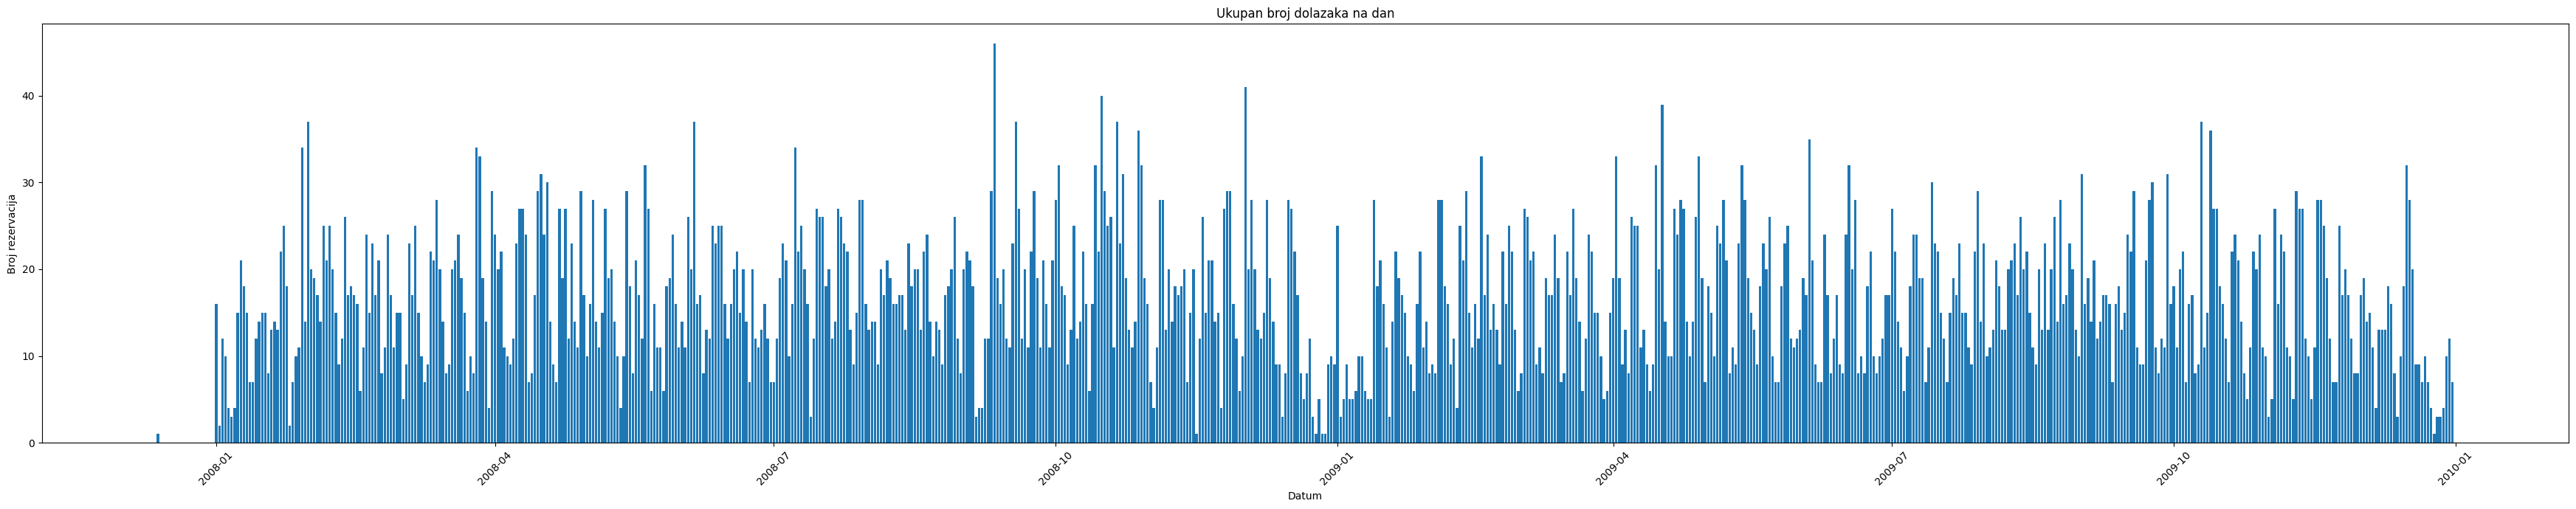

In [80]:
plt.figure(figsize=(35, 7))  
plt.bar(arrival_count.index, arrival_count["count"])
plt.title("Ukupan broj dolazaka na dan")
plt.xlabel("Datum")
plt.ylabel("Broj rezervacija")
plt.xticks(rotation = 45) 
plt.tight_layout()  
plt.show()